# 9.1 加载CIFAR-10数据

In [4]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

/Users/hongjunwu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/hongjunwu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/hongjunwu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
(x_img_train, y_label_train), \
(x_img_test, y_label_test) = cifar10.load_data()

In [6]:
print('train: ', len(x_img_train))
print('test: ', len(x_img_test))

train:  50000
test:  10000


# 9.2 查看训练数据

In [7]:
x_img_train.shape

(50000, 32, 32, 3)

In [8]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ..., 
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ..., 
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ..., 
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ..., 
       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ..., 
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ..., 
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ..., 
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67,

In [9]:
y_label_train.shape

(50000, 1)

# 9.3 查看多项images与label

In [10]:
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 
              5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [11]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        title=str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' + label_dict[prediction[i]]
            
        ax.set_title(title, fontsize = 12, color = 'white')
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

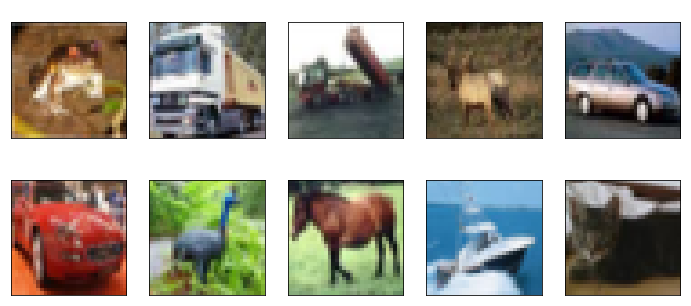

In [12]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

# 9.4 将images进行预处理

In [13]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [14]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [15]:
x_img_train_normalize[0][0][0]

array([ 0.23137255,  0.24313726,  0.24705882], dtype=float32)

# 9.5 对label数据进行预处理

In [19]:
y_label_train.shape

(50000, 1)

In [20]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [22]:
y_label_train_OneHot.shape

(50000, 10)

In [23]:
y_label_train_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)